<a href="https://colab.research.google.com/github/codeinfinity-fahad/CardiotocographyFetalAnalysis/blob/main/Cardiotocography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

np.random.seed(0)
seed = 30

# **What is random seed and why do we use it?**

**Seed function is used to save the state of a random function, so that it can generate same random numbers on multiple executions of the code on the same machine or on different machines (for a specific seed value). The seed value is the previous value number generated by the generator. For the first time when there is no previous value, it uses current system time. **

In [ ]:
color = ["grey", "magenta", "palevioletred"]
plt.style.use('seaborn-darkgrid') 

<ipython-input-2-afe306e5b905>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CTG.csv to CTG.csv


In [ ]:
df = pd.read_csv("CTG.csv")

# **Performing Data Cleaning, that is removing Unnecassary objects or value from our Dataset.**

In [ ]:
df.head(5)

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


# **Some Abbreviation in Dataset are:-**

FileName: of CTG examination

Date: of the examination

b: start instant

e: end instant

LBE: baseline value (medical expert)

LB: baseline value (SisPorto)¶

AC: accelerations (SisPorto)

FM: foetal movement (SisPorto)

UC: uterine contractions (SisPorto)

ASTV: percentage of time with abnormal short term variability (SisPorto)

mSTV: mean value of short term variability (SisPorto)¶

ALTV: percentage of time with abnormal long term variability (SisPorto)

mLTV: mean value of long term
variability (SisPorto)

DL: light decelerations

DS: severe decelerations

DP: prolongued decelerations

DR: repetitive decelerations¶

Width: histogram width

Min: low freq. of the histogram

Max: high freq. of the histogram

Nmax: number of histogram peaks

Nzeros: number of histogram zeros

Mode: histogram mode

Mean: histogram mean

Median: histogram median

Variance: histogram variance

Tendency: histogram tendency: -1=left assymetric; 0=symmetric; 1=right assymetric

A: calm sleep

B: REM sleep

C: calm vigilance

D: active vigilance

SH: shift pattern (A or Susp with shifts)

AD: accelerative/decelerative pattern (stress situation)

DE: decelerative pattern (vagal stimulation)

LD: largely decelerative pattern
FS: flat-sinusoidal pattern (pathological state)

SUSP: suspect pattern

CLASS: Class code (1 to 10) for classes A to SUSP¶

NSP: Normal=1; Suspect=2; Pathologic

In [ ]:
df = df.drop(["FileName", "Date", "SegFile", "b", "e"], axis=1)

Let us check the Dataset again to see if Unnecesary columns like FileName, Date, SegFile, b, e.. that has nothing to do with the Machine Learning Model is dropped or not.

In [ ]:
df.head()
print()
df.columns

Index(['LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL',
       'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD',
       'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object')

In [ ]:
df.shape

(2129, 35)

In [ ]:
df.isnull().sum()

LBE         3
LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
DR          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
NSP         3
dtype: int64

# **So if we see our above code our Dataset is free from any null value.**

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [ ]:
df.dtypes

LBE         float64
LB          float64
AC          float64
FM          float64
UC          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
DL          float64
DS          float64
DP          float64
DR          float64
Width       float64
Min         float64
Max         float64
Nmax        float64
Nzeros      float64
Mode        float64
Mean        float64
Median      float64
Variance    float64
Tendency    float64
A           float64
B           float64
C           float64
D           float64
E           float64
AD          float64
DE          float64
LD          float64
FS          float64
SUSP        float64
CLASS       float64
NSP         float64
dtype: object

In [ ]:
X = df[['LBE', 'LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'DR']]
Y = df[["NSP"]]

# **Why do we perform scaling in Machine Learning Models?**

--> **Scaling is important in machine learning models because it can:**

**Prevent numerical issues and improve the stability of algorithms.**

**Improve model performance by ensuring features with different magnitudes are treated equally.**

**Make it easier to interpret the coefficients or feature importances.**

**Help optimization algorithms converge faster, particularly in deep learning models.**

**Overall, scaling helps ensure that the data is in a consistent format that can be effectively used by the machine learning model.**

# **Feature Scaling**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 30)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1594, 9) (532, 9) (1594, 1) (532, 1)


In [ ]:
#looking at the scaled features
import seaborn as sns
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(15,6))
sns.boxenplot(data = X_df,palette = shades)
plt.xticks(rotation=90)
plt.show()

NameError: ignored

<Figure size 1500x600 with 0 Axes>

**The above plot shows the range of our feature attributes. All the features are in different ranges. To fit this in a model we must scale it to the same range.**

**In the model building, we will preprocess the features to do the same.**

# **What is the use of boxplots in Machine Learning Models?**

--> **In machine learning, boxplots can be used to visualize the distribution of features (input variables) and target variables (output variables) in the dataset. This can help identify any potential issues such as outliers or skewed data that may impact the performance of the model. Boxplots can also be used to compare the distribution of a feature between different groups or classes, which can be useful in identifying any significant differences.**

**Additionally, boxplots can be used to evaluate the performance of machine learning models by visualizing the distribution of predicted values and actual values. This can help identify any bias or variance in the model, as well as identify any outliers or extreme values that may be impacting the model's performance.**

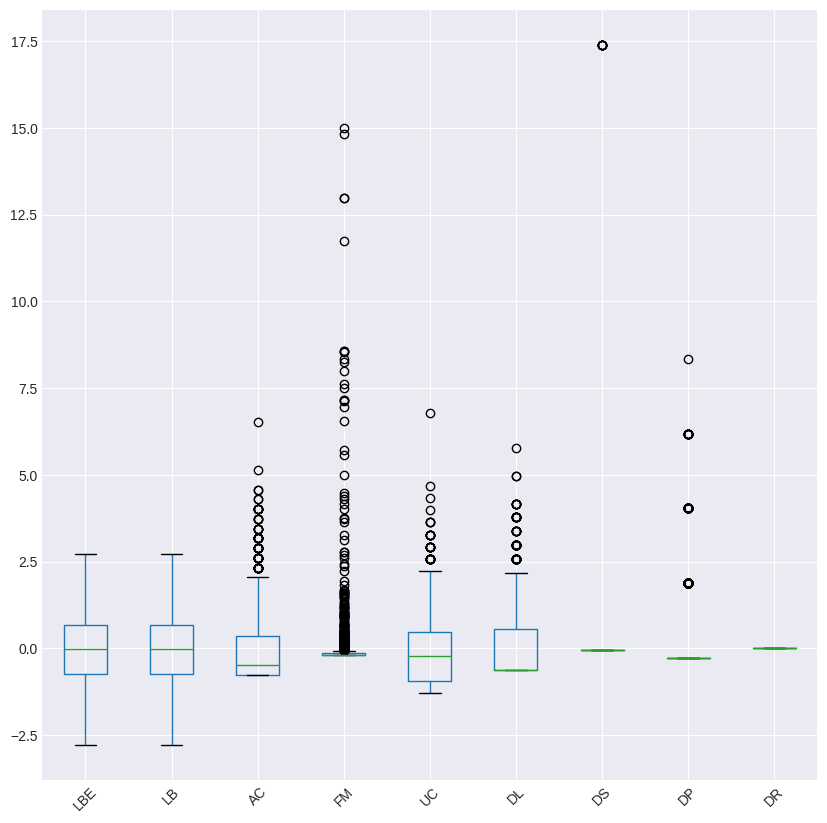

In [ ]:
# Boxplots for feature distributions
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
df_scale_X = pd.DataFrame(sklearn.preprocessing.scale(X), columns=X.columns)
df_scale_X.boxplot(ax=ax, rot=45)
plt.show()

# **What can be deduced from the above box-plot?**

-->**There are several observations in which a feature value deviates from the feature mean by more than five standard deviations. These extreme values could potentially indicate instrument error, but it is also possible that they are part of the true distribution's fat-tails, which could provide valuable information. However, if these outliers are indeed errors, they could adversely affect our classifier's performance. Later on, we will examine the impact of outlier detection algorithms on performance.**

# **Why do we check the value of Gamma in Support Vector Machine?**

**In the Support Vector Machine (SVM) algorithm, gamma is a hyperparameter that determines the shape of the decision boundary between classes. Specifically, gamma controls the influence of individual training samples on the decision boundary.**

**The gamma parameter determines the reach of a single training example, where low values mean that every example has a far reach, and high values mean that examples have a closer reach. In other words, a small gamma value will result in a smoother decision boundary, while a large gamma value will result in a more complex, wiggly decision boundary that closely fits the training data.** 

**Therefore, choosing the appropriate value of gamma is crucial for achieving optimal classification accuracy. If the gamma value is too high, the model may overfit the training data and fail to generalize well to new, unseen data. If the gamma value is too low, the model may underfit the data and fail to capture the underlying patterns and relationships between features.** 

**To determine the optimal value of gamma, hyperparameter tuning techniques such as grid search or randomized search can be used to explore a range of gamma values and select the one that yields the best cross-validation performance.**

 **Alternatively, other techniques such as empirical trial-and-error or expert knowledge can also be used to select an appropriate gamma value.**

<Axes: ylabel='count'>

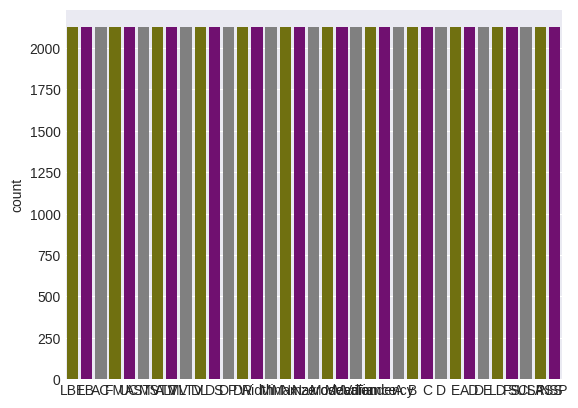

In [ ]:
import seaborn as sns
colours=["olive","purple", "gray"]
sns.countplot(data = df, palette = colours)

# **What is countplot in seaborn used for?**

**It is essentially a histogram that deal with categorical data rather than numerical, variable. countplot is particularly useful when you want to visualize the distribution of categorical variables in your dataset, or when you want to compare the frequency of different categories across different groups or subgroups. For example, you might use countplot to visualize the distribution of different car models in a dataset, or to compare the frequency of different types of crimes across different cities.**

<Axes: >

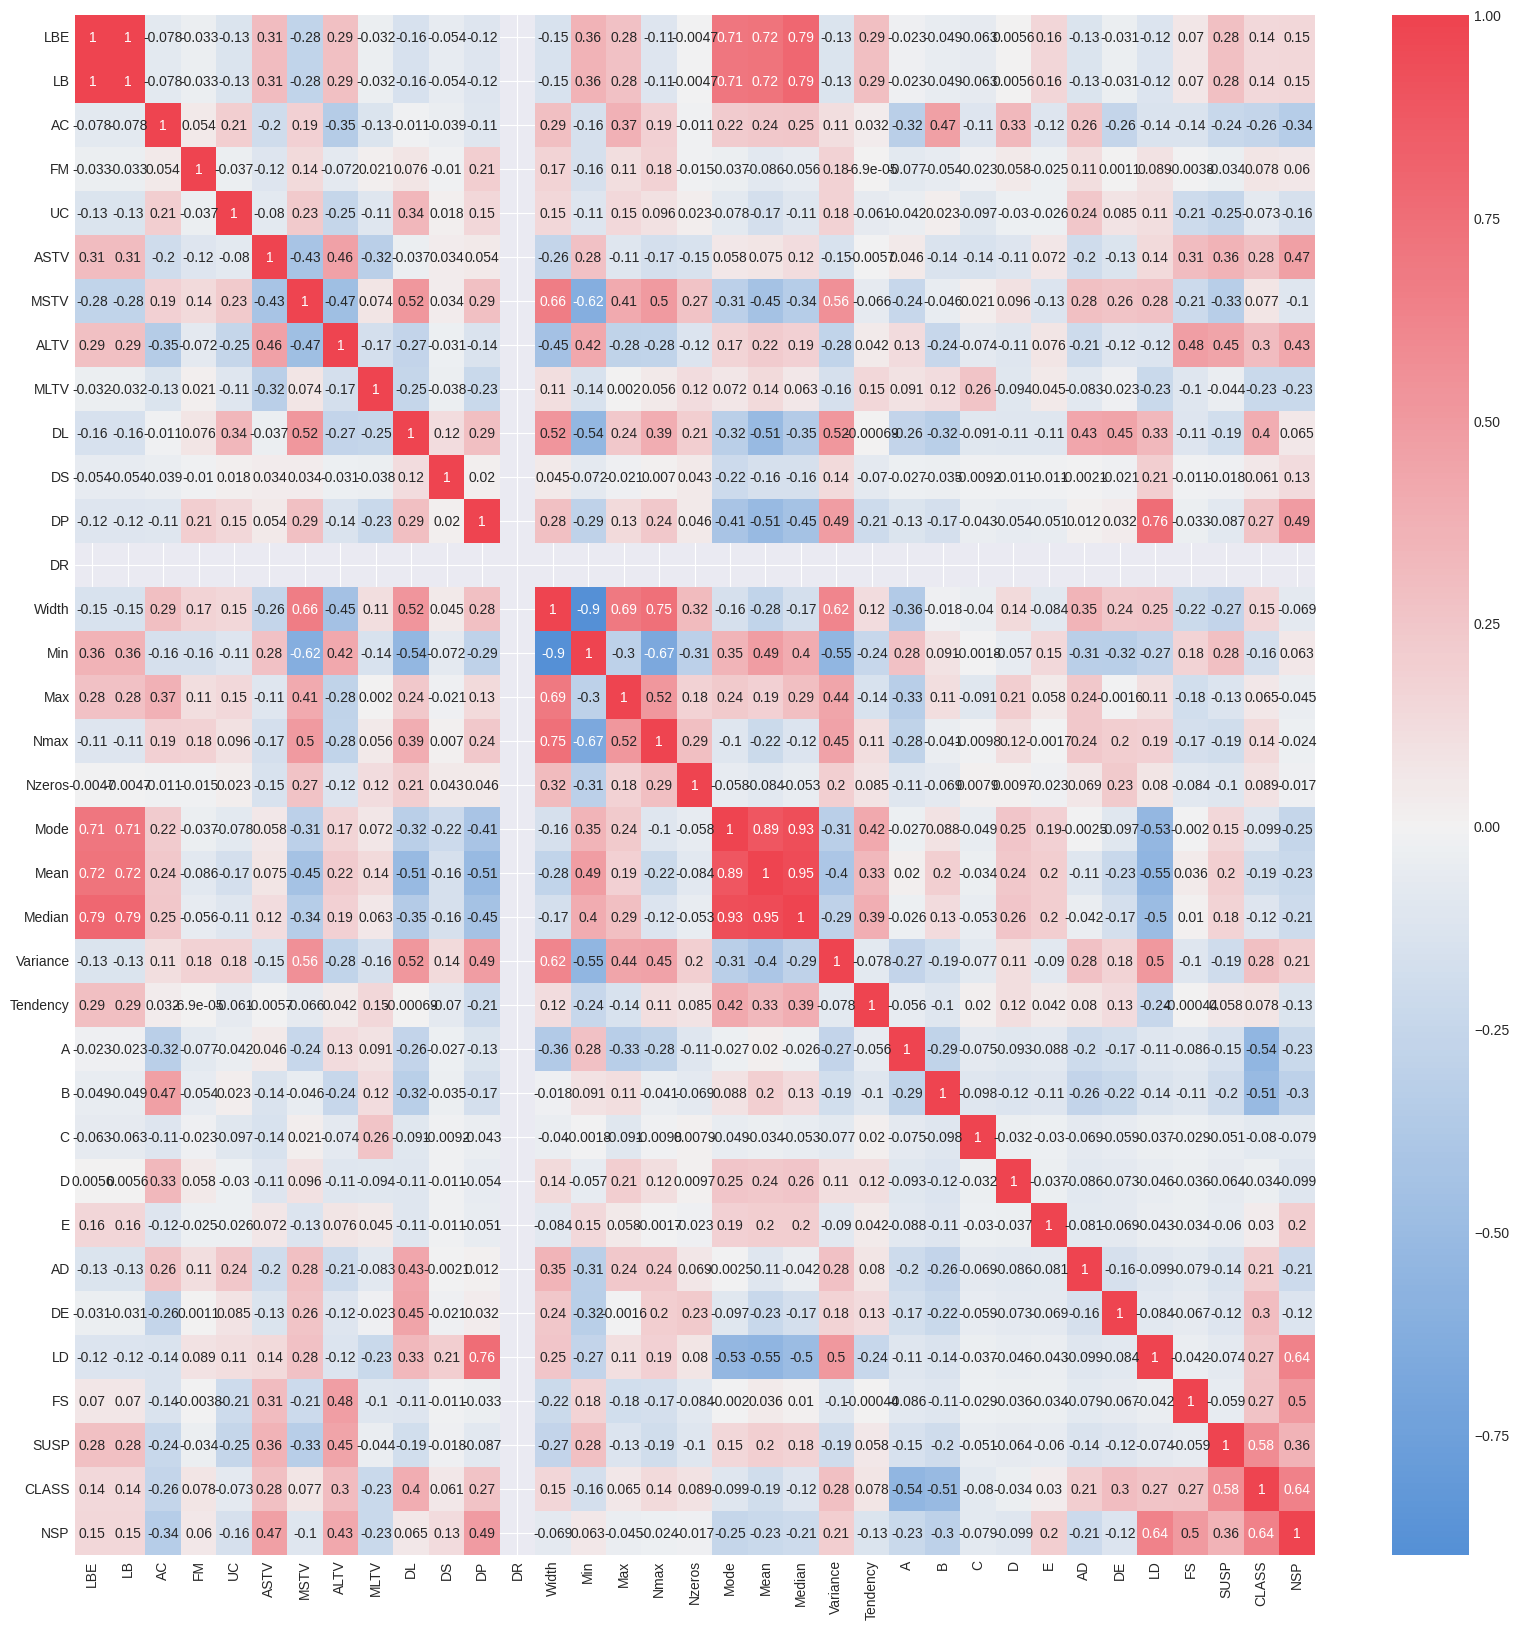

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 20))

cmap = sns.diverging_palette(250, 10, s = 80, l= 55, n = 9, as_cmap = True)

sns.heatmap(corr_matrix, annot = True, cmap = cmap, center = 0)

In [ ]:
import copy
from sklearn.impute import KNNImputer


def zscore_outlier_removal(X, threshold=100):
    """ Sets feature values in X that are more than (threshold * feature standard deviation) away from feature mean
    to NaN. Returns X with original length but some column values are NaN. At default value 100, no outlier treatment occurs.
    """
    new_X = copy.deepcopy(X)
    new_X[abs(sklearn.preprocessing.scale(X)) > threshold] = np.nan

    return new_X

# Make zscore feature outlier removal a transformer function
zscore_outlier_removal = sklearn.preprocessing.FunctionTransformer(zscore_outlier_removal,
    kw_args=dict(threshold=7))


# Replace feature outliers with imputed values via KNN
KNN_impute = KNNImputer()


# **Z-score**
  ---------

**Z-score, also known as the standard score, is a statistical measure that quantifies the number of standard deviations a data point is from the mean of a dataset. The formula for calculating the z-score is:**

======================
***z = (x - μ) / σ***
======================

======================

**where x is the data point, μ is the mean of the dataset, and σ is the standard deviation of the dataset. A positive z-score indicates that the data point is above the mean, while a negative z-score indicates that the data point is below the mean. The absolute value of the z-score represents the distance from the mean in terms of the number of standard deviations. The z-score is commonly used in statistical analysis to identify outliers and to standardize data for comparison purposes.**

In [ ]:
# Polynomial feature expansion
poly = sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# demean and scale to unit variance
scale = sklearn.preprocessing.StandardScaler()

# **Cross-Validation and Model Selection**

**When comparing models using cross-validation, it is crucial to include all pre-processing steps as part of the model pipeline. This pipeline should only be fitted on the training data within the respective fold. For instance, if we want to apply outlier treatment and feature scaling before using an SVM classifier, the pipeline would consist of these pre-processing steps followed by the SVM classifier. During each fold, the entire pipeline must be fit to the training data and then evaluated on the test set. It is essential to note that the feature means and variances used to calculate z-scores and perform scaling are based on the feature distributions in the training set and not the test set. If we were to pre-process the entire dataset before performing cross-validation, we would use information from outside the training set, which could result in leakage and inflated out-of-sample scores.**


In [ ]:
def print_cv(cv, X, Y, model_name):
    """ Prints best score, best parameter values, and in and out of sample confusion matrices for a cv
    result """
    print('Results for {}:'.format(model_name))
    print('The best out-of-sample performance is {}'.format(cv.best_score_))
    print('Best parameter values: ', cv.best_params_)

    pred = cv.best_estimator_.predict(X)
    print('In-sample confusion matrix of best estimator:\n{}'.format(sklearn.metrics.confusion_matrix(Y, pred)))

    cross_val_pred = sklearn.model_selection.cross_val_predict(cv.best_estimator_, X, Y, cv=5, n_jobs=-1)
    print('Out-of-sample confusion matrix of best estimator:\n{}'.format(
        sklearn.metrics.confusion_matrix(Y, cross_val_pred)))

    return


In [ ]:
from sklearn.pipeline import Pipeline
svm = sklearn.svm.SVC(C=1, kernel='rbf', gamma='scale', class_weight='balanced', probability=True,
    decision_function_shape='ovr')
svm_pipe = sklearn.pipeline.Pipeline(
    [('outlier', zscore_outlier_removal), ('impute', KNN_impute), ('scale', scale), ('svm', svm)])
# values to try for cross-validation
zscore_threshold_vals = [100, 9, 8, 7, 6, 5, 4, 3]  # 100 = no outlier treatment
kernels = ['rbf', 'poly']
poly_degrees = [1, 2, 3] # degrees of polynomial expansion (only relevant for polynomial kernel)
penalty_vals = [np.e ** i for i in np.linspace(-3, 3, 8)]
# kernel and penalty search
svm_grid = {"svm__C": penalty_vals, "svm__kernel": kernels, "svm__degree": poly_degrees}

svm_cv = sklearn.model_selection.GridSearchCV(svm_pipe, svm_grid, scoring='balanced_accuracy', n_jobs=-1,
    refit=True, verbose=True, return_train_score=True, cv=5)
svm_cv.fit(X, Y)
print_cv(svm_cv, X, Y, 'support vector machine')


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Results for support vector machine:
The best out-of-sample performance is 0.7055848865112011
Best parameter values:  {'svm__C': 0.2764530466295644, 'svm__degree': 1, 'svm__kernel': 'rbf'}
In-sample confusion matrix of best estimator:
[[1271  265  119]
 [  15  246   34]
 [   8   47  121]]
Out-of-sample confusion matrix of best estimator:
[[1234  266  155]
 [  29  228   38]
 [  22   49  105]]


In [ ]:
from sklearn.svm import SVC

svm_clf=SVC(kernel="poly",degree=6,coef0=5,gamma=0.1)
svm_clf=svm_clf.fit(X_train,Y_train)
Y_pred=svm_clf.predict(X_test)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(confusion_matrix(Y_test,Y_pred))

In [ ]:
f1_score(Y_test,Y_pred,average='weighted')

In [ ]:
accuracy_score(Y_test,Y_pred)

In [ ]:
precision_score(Y_test,Y_pred,average='weighted')

In [ ]:
recall_score(Y_test,Y_pred,average="weighted")

In [ ]:
tree_clf=DecisionTreeClassifier(min_samples_split=6, min_samples_leaf=4, max_depth=6, )
tree_clf=tree_clf.fit(X_train,Y_train)
Y_pred=tree_clf.predict(X_test)


0.8703007518796992

In [ ]:
print(X_test * 100,"%")